# EDA - Understanding what the Numeric Columns look like
### Goals:
 - Make sure there are no NA values left in the dataset
 - Look at distributions for all relavent numeric columns to understand what the skew looks like
 - Remove outlier values and account for how many rows are removed at each step to undertsand how the data is being affected
 - Log transform the numeric columns that have heavily skewed distributions to understand the trends in the data better
 - Export final csv for modeling with new understanding found from eda

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv('final_cleaned_tmdb.csv', keep_default_na=False)
# print columns with nan values
print(df.isna().sum())

imdb_id                 0
tmdb_id                 0
title                   0
release_date            0
genres                  0
revenue                 0
budget                  0
runtime                 0
vote_average            0
vote_count              0
top_cast                0
director                0
keywords                0
spoken_languages        0
collection_name         0
watch_providers         0
production_companies    0
certification           0
overview                0
poster_url              0
error                   0
themes                  0
profit_in_millions      0
budget_log              0
revenue_log             0
runtime_log             0
vote_count_log          0
dtype: int64


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59428 entries, 0 to 59427
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               59428 non-null  object 
 1   tmdb_id               59428 non-null  int64  
 2   title                 59428 non-null  object 
 3   release_date          59428 non-null  object 
 4   genres                59428 non-null  object 
 5   revenue               59428 non-null  int64  
 6   budget                59428 non-null  int64  
 7   runtime               59428 non-null  int64  
 8   vote_average          59428 non-null  float64
 9   vote_count            59428 non-null  int64  
 10  top_cast              59428 non-null  object 
 11  director              59428 non-null  object 
 12  keywords              59428 non-null  object 
 13  spoken_languages      59428 non-null  object 
 14  collection_name       59428 non-null  object 
 15  watch_providers    

In [73]:
df.head(5)

,imdb_id,tmdb_id,title,release_date,genres,revenue,budget,runtime,vote_average,vote_count,...,certification,overview,poster_url,error,themes,profit_in_millions,budget_log,revenue_log,runtime_log,vote_count_log
0,tt0011237,2972,The Golem: How He Came Into the World,1920-10-28,"Fantasy, Horror",0,0,76,6.900,215,...,,"In 16th-century Prague, a rabbi creates the Go...",https://image.tmdb.org/t/p/w500/7zdqM0MgZBfy3t...,,"Horror, the undead and monster classics|Creepy...",0.00,0.00000,0.000000,4.343805,5.375278
1,tt0012532,42511,Orphans of the Storm,1921-12-28,"Drama, History, Romance",0,0,150,6.830,88,...,NR,"France, on the eve of the French Revolution. H...",https://image.tmdb.org/t/p/w500/gbBzFuiVnuSPYZ...,,Epic history and literature|Politics and human...,0.00,0.00000,0.000000,5.017280,4.488636
2,tt0012349,10098,The Kid,1921-01-21,"Comedy, Drama",2500000,250000,68,8.155,2182,...,,A tramp cares for a boy after he's abandoned a...,https://image.tmdb.org/t/p/w500/drgMcyTsySQBnU...,,Moving relationship stories|Crude humor and sa...,2.25,12.42922,14.731802,4.234107,7.688455
3,tt0011841,31509,Way Down East,1920-09-03,"Drama, Romance",4500000,0,150,7.000,104,...,NR,A naive country girl is tricked into a sham ma...,https://image.tmdb.org/t/p/w500/xzrSiQuiSb5hKe...,,Moving relationship stories|Enduring stories o...,4.50,0.00000,15.319588,5.017280,4.653960
4,tt0013086,5998,"Dr. Mabuse, the Gambler",1922-04-27,"Crime, Thriller",0,0,271,7.661,196,...,,Dr. Mabuse and his organization of criminals a...,https://image.tmdb.org/t/p/w500/ysHJDo9do2USU1...,,"Thrillers and murder mysteries|Crime, drugs an...",0.00,0.00000,0.000000,5.605802,5.283204


array([[<Axes: title={'center': 'revenue'}>,
        <Axes: title={'center': 'budget'}>],
       [<Axes: title={'center': 'vote_average'}>,
        <Axes: title={'center': 'vote_count'}>],
       [<Axes: title={'center': 'runtime'}>, <Axes: >]], dtype=object)

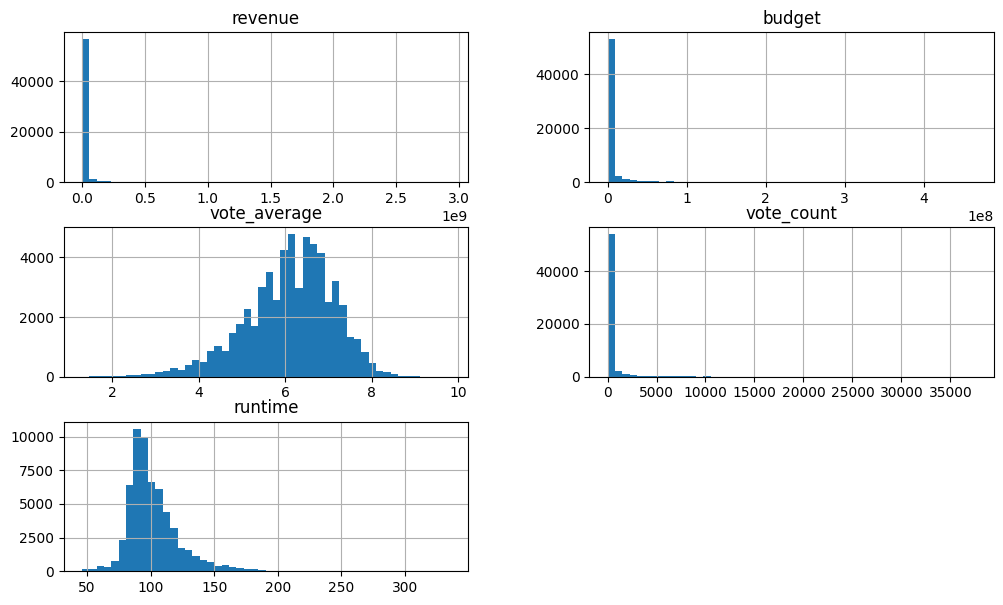

In [74]:
numeric_columns = ['revenue', 'budget', 'vote_average', 'vote_count', 'runtime']
df.hist(numeric_columns, figsize=(12,7), bins=50)

### Most numeric values have very distinct problems:
- revenue, budget, vote_average and vote_count all have an immense amount of values at 0
- runtime has a better spread but still a lot of values at zero, which doesnt make sense for movies

In [75]:
# remove where runtime is less than 45 minutes - 11 rows were removed
df = df[df['runtime'] > 45]

In [76]:
# remove rows where vote_count is less than 10
df = df[df['vote_count'] > 10]

In [77]:
# log transform numeric columns
for col in ["budget","revenue","runtime","vote_count"]:
    df[f"{col}_log"] = np.log1p(df[col])


array([[<Axes: title={'center': 'budget_log'}>,
        <Axes: title={'center': 'revenue_log'}>],
       [<Axes: title={'center': 'runtime_log'}>,
        <Axes: title={'center': 'vote_count_log'}>]], dtype=object)

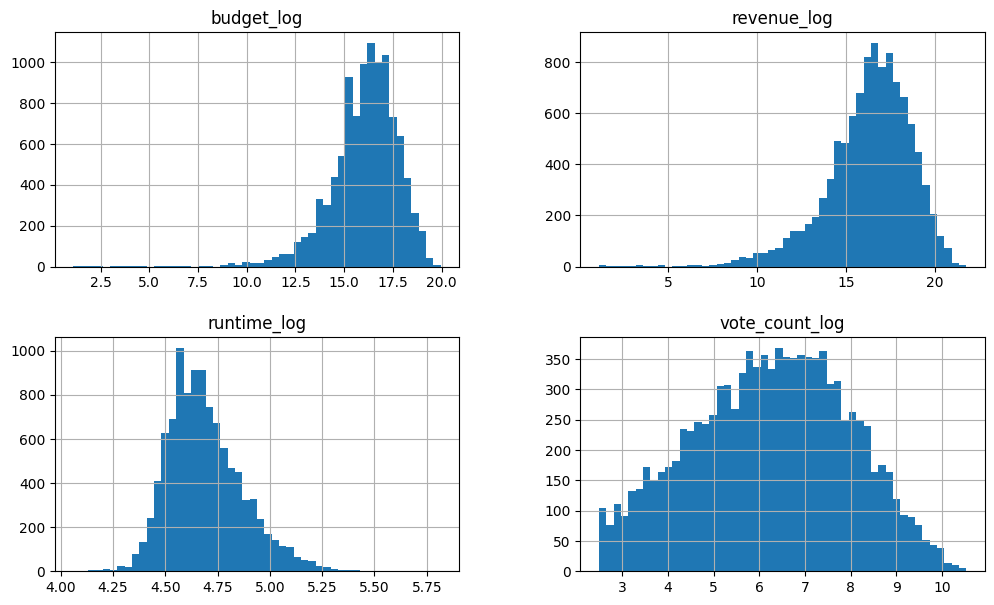

In [78]:
# create a list of log transformed columns
log_numeric_columns = [f"{col}_log" for col in ["budget","revenue","runtime","vote_count"]]

# make a copy of df for plotting
df_plot = df.copy()

# remove revenue and budget < 2.5 (log)
cols = ['revenue', 'budget']
for col in cols:
    df_plot = df_plot[df_plot[col] > 1.5]

df_plot.hist(log_numeric_columns, figsize=(12,7), bins=50)

## **Diving Deeper into the data**

Text(0.5, 0, 'Budget and Revenue (log scale)')

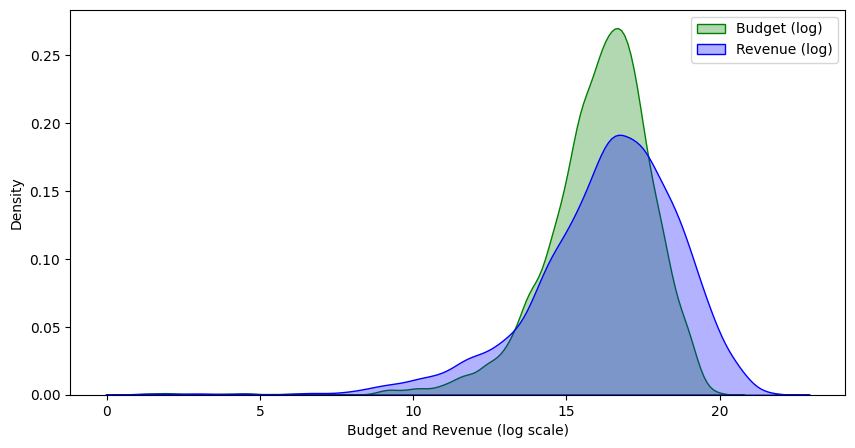

In [99]:
# revenue vs budget distributions density chart
plt.figure(figsize=(10,5))
sns.kdeplot(df_plot['budget_log'], label='Budget (log)', fill=True, alpha=0.3, color = 'green')
sns.kdeplot(df_plot['revenue_log'], label='Revenue (log)', fill=True, alpha=0.3, color= 'blue')
plt.legend()
plt.xlabel('Budget and Revenue (log scale)')

### Density of Budget vs Revenue (log)
- Budget seems to have a tighter window of values, indicating there is a standard that most movies use in regard to it
- Revenue has a broader spread, indicating that movie earnings vary widely — while some films earn just enough to recoup costs, others generate massive profits, resulting in a longer right tail in the distribution.

Text(0.5, 1.0, 'Vote Count vs Vote Average (corr=0.44)')

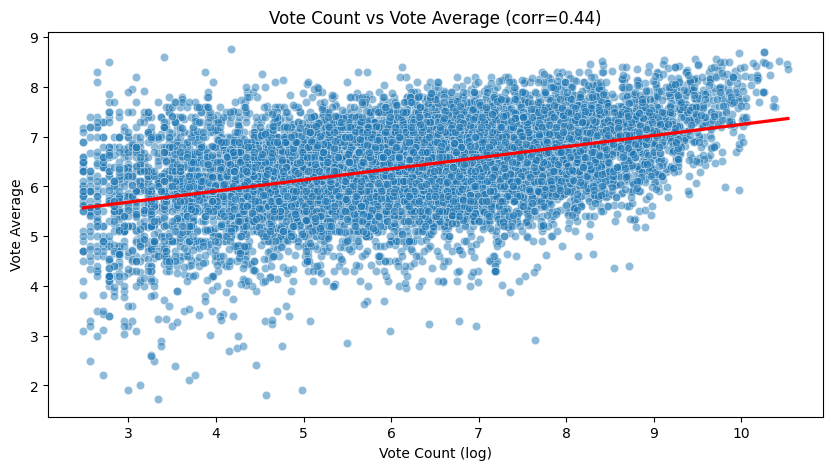

In [80]:
# vote count vs vote average correlation (in title) with line
corr_vote = df_plot['vote_count_log'].corr(df_plot['vote_average'])
plt.figure(figsize=(10,5))
sns.scatterplot(x='vote_count_log', y='vote_average', data=df_plot, alpha=0.5)
sns.regplot(x='vote_count_log', y='vote_average', data=df_plot, scatter=False, color='red')
plt.xlabel('Vote Count (log)')
plt.ylabel('Vote Average')
plt.title(f'Vote Count vs Vote Average (corr={corr_vote:.2f})')

### Vote Count vs Vote Average
- This plot explores the relationship between a movie’s popularity (vote count) and its average rating
- With a correlation of 0.44, this indicates a moderately weak relationship between the two variables
- This suggests that while viewer engagement does reflect a movie’s performance to some extent, the connection is not as strong as one might assume

Text(0.5, 1.0, 'Runtime vs Vote Average (corr=0.33)')

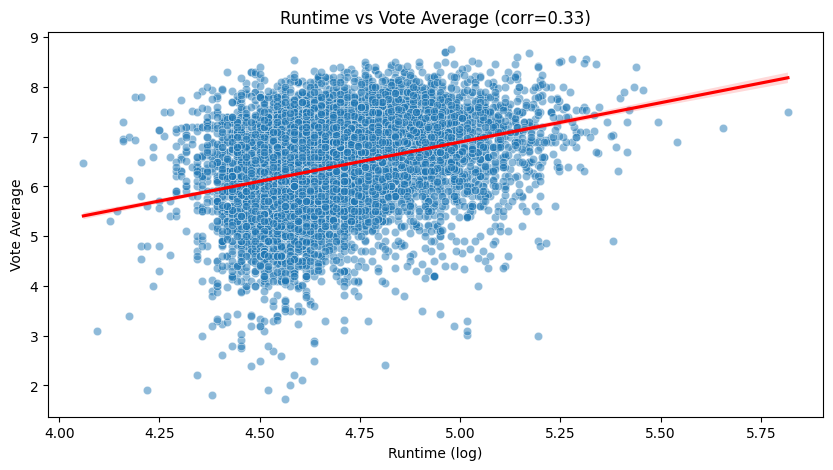

In [81]:
# runtime vs vote average correlation (in title) with line
corr_runtime = df_plot['runtime_log'].corr(df_plot['vote_average'])
plt.figure(figsize=(10,5))
sns.scatterplot(x='runtime_log', y='vote_average', data=df_plot, alpha=0.5)
sns.regplot(x='runtime_log', y='vote_average', data=df_plot, scatter=False, color='red')
plt.xlabel('Runtime (log)')
plt.ylabel('Vote Average')
plt.title(f'Runtime vs Vote Average (corr={corr_runtime:.2f})')

### Runtime vs Vote Average
- This plot shows whether longer movies tend to be rated more favorably
- A slight positive correlation is shown, implying that longer runtimes are weakly associated with higher average ratings
- This makes sense as most longer films tend to be more narrative driven and have more time to develop, explaining why there is a realationship between the two

Text(0.5, 1.0, 'Top 10 Most Appeared Themes')

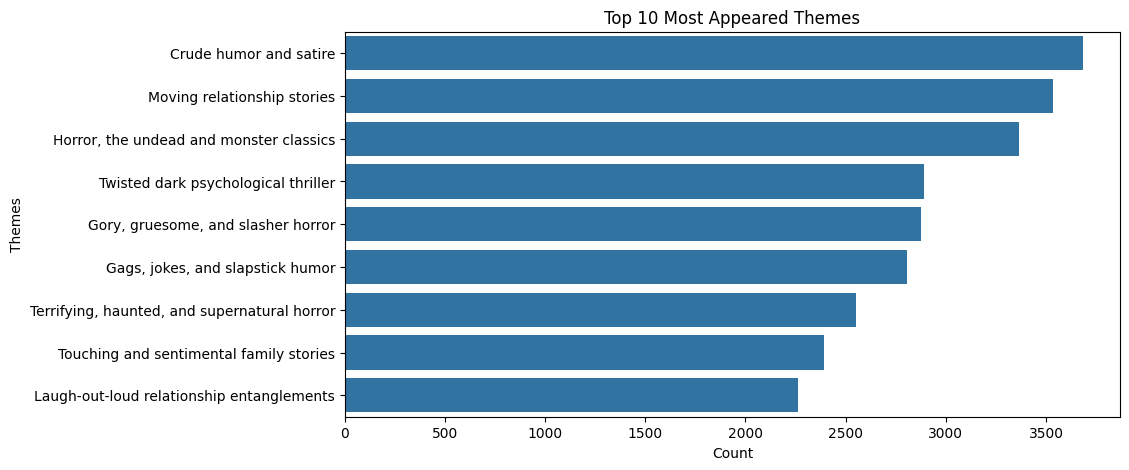

In [ ]:
# top 10 most appeared themes
top_themes = df['themes'].str.split('|').explode().value_counts().head(10)
# remove  "" from the themes
top_themes = top_themes[top_themes.index != '']

plt.figure(figsize=(10,5))
sns.barplot(y=top_themes.index, x=top_themes.values, orient='h')
plt.ylabel('Themes')
plt.xlabel('Count')
plt.title('Top 10 Most Appeared Themes')


### Top 10 Most Appeared Themes
- "Crude humor and satire" tops the list with over 3,500 appearances, indicating a popularity for comedic content.
- Relationship-driven stories and horror subgenres make up a large portion of the top themes — from emotional narratives like "Moving relationship stories" to darker tones like "Gory, gruesome, and slasher horror" and "Terrifying, haunted, and supernatural horror."
- These genres are often less expensive to produce than large-scale action or sci-fi films, leading to more low-budget or indie entries that can skew the dataset distribution.
- The theme variety reflects the wide range of audience interests — from lighthearted humor and romance to psychologically intense or supernatural experiences.
- These insights are useful when predicting knowing that we dont have to put a huge emphasis on themes as there are a wide group that are available that may skew the data if we put too much power on the feature


Text(0.5, 1.0, 'Top 10 Most Appeared Genres')

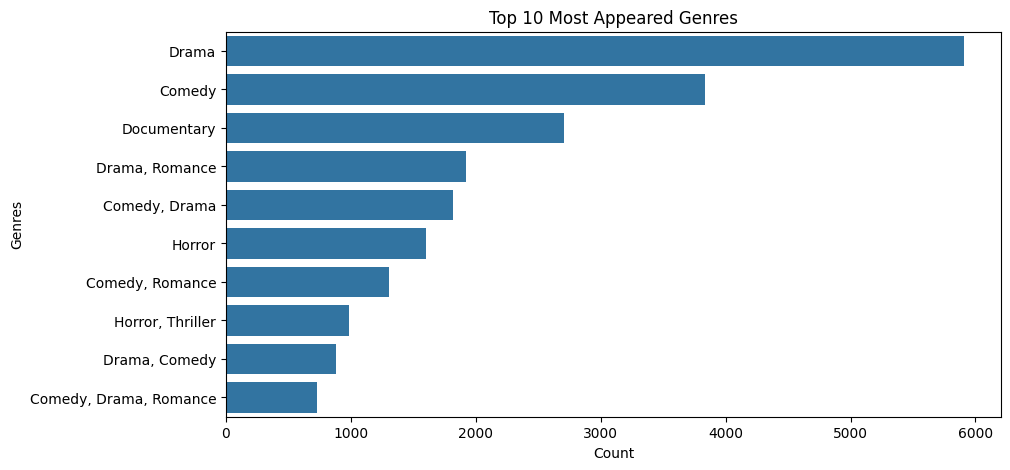

In [95]:
# Top 10 genre counts
top_genres = df['genres'].str.split('|').explode().value_counts().head(10)

# remove "" from the genres
top_genres = top_genres[top_genres.index != '']

plt.figure(figsize=(10,5))
sns.barplot(y=top_genres.index, x=top_genres.values, orient='h')
plt.ylabel('Genres')
plt.xlabel('Count')
plt.title('Top 10 Most Appeared Genres')

### Top 10 Most Appeared Genres
- Now working with genres — which contain significantly fewer missing values than themes — this chart provides a more reliable representation of the overall dataset.
- Drama and Comedy movies dominate the top 10, indicating their broad appeal across both mainstream and independent cinema.
- These genres are often flexible and adaptable, appearing in everything from low-budget indie films to large-scale productions, which contributes to their high frequency.
- Thriller, and Horror also appear frequently, reflecting the popularity of high-stakes or intense storytelling.
- The distribution suggests that while niche genres exist, most movies fall into a small group of broadly popular categories — something that can influence genre-based recommendation systems or audience targeting.
- Understanding high occuring genres can help me better understand what movies will impact the data the most and drive the prediction power of the model


In [82]:
# export to csv
df.to_csv('final_cleaned_tmdb.csv', index=False)